ModuleNotFoundError: No module named 'mp1_tookits'

In [81]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [82]:
X,Y= make_circles(n_samples=500,noise=0.01)

In [83]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


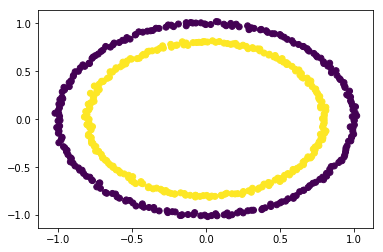

In [84]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [85]:
def phi(X):
    
    X1=X[:,0]
    X2=X[:,1]
    X3=X1**2+X2**2
    
    X_=np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1]=X
    X_[:,-1]=X3
    
    return X_


In [86]:
def plot3d(X,show==True):
    
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    
    X1=X[:,0]
    X2=X[:,1]
    X3=X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y)
    
    plt.show()
    

SyntaxError: invalid syntax (<ipython-input-86-cf40825caccc>, line 1)

In [ ]:
X_=phi(X)
plot3d(X_)

In [ ]:
#Logistic Classifier

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
lr=LogisticRegression()

In [90]:
acc=cross_val_score(lr,X,Y,cv=5).mean()
print(acc*100)

44.2


In [91]:
acc=cross_val_score(lr,X_,Y,cv=5).mean()
print(acc*100)

46.8


In [92]:
#Visualize the decision surface

In [93]:
lr.fit(X_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
wts=lr.coef_

In [95]:
bias=lr.intercept_

In [96]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [97]:
z=-(wts[0,0])*xx+( wts[0,1]**yy+ bias) / wts[0,2]

In [98]:
print(z)

[[-328.59236402 -328.5790931  -328.56582217 -328.55255125]
 [  57.43398474   57.44725566   57.46052658   57.4737975 ]
 [ -11.19962566  -11.18635474  -11.17308381  -11.15981289]
 [   1.00309701    1.01636793    1.02963885    1.04290977]]


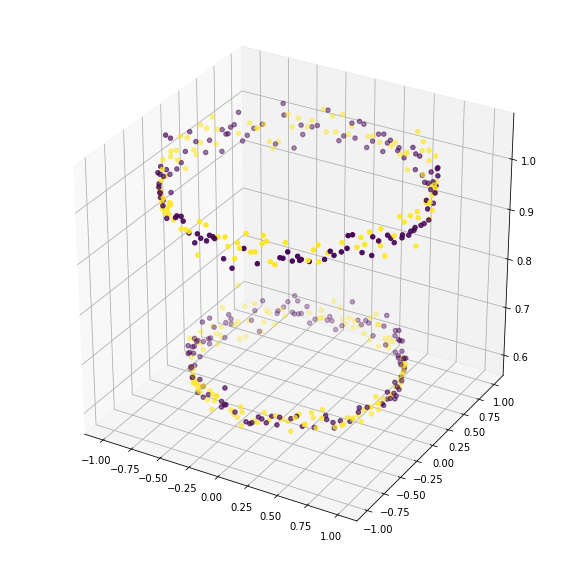

In [99]:
ax=plot3d(X_,False)

In [100]:
ax.plot_surface(xx,yy,z,alpha=0.5)
plt.show()

AttributeError: 'NoneType' object has no attribute 'plot_surface'

In [ ]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

In [102]:
from sklearn import svm

In [120]:
svc=svm.SVC(kernel="poly")

In [121]:
svc.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [122]:
svc.score(X,Y)

0.538

In [123]:
#Custom kernel

In [133]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

In [134]:
svc=svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0